# Wine Dataset for Clustering

    Uso do algoritmo de clusterização K-Means em cluster de vinhos baseado em seus constituintes químicos 
    
https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

### Contexto

Este conjunto de dados é adaptado do Wine Data Set de https://archive.ics.uci.edu/ml/datasets/wine, removendo as informações sobre os tipos de vinho para aprendizado não supervisionado.

As seguintes descrições são adaptadas da página da UCI:

Esses dados são o resultado de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontradas em cada um dos três tipos de vinhos.


### Conteúdo 

Os atributos são:

* *Alcohol*: álcool
* *Malic acid*: ácido málico
* *Ash*: cinzas
* *Alcalinity of ash*: alcalinidade (se é básica, não ácida) das cinzas
* *Magnesium*: magnésio
* *Total phenols*: fenóis totais (composto orgânico ligado a composto aromático)
* *Flavanoids*: flavonóides (pigmentos naturais)
* *Nonflavanoid phenols*: fénois não flavonóides
* *Proanthocyanins*: proantocianinas
* *Color intensity*: intensidade da cor
* *Hue*: matiz (colorimetria)
* *OD280/OD315 of diluted wines*: fator OD280/OD315 de vinhos diluídos
* *Proline*: prolina (aminoácido)

In [1]:
# Importação das bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Informa como importar arquivo a ser usado na análise 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


In [3]:
# Importando dataset 'heart.csv' do Kaggle 
wine = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Análise Exploratória

Inicialmente gerar as entradas e saídas do dataframe para ter conhecimento sobre como os dados estão estruturados.

In [4]:
# Resumo sobre o tipo das variáveis
wine.info()

# Distribuições estatísticas sobre os dados 
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Com essas informações observamos que não há missing values no conjunto de dados e com as informações estatísticas podemos ver alguns valores divergentes, como no valor máximo de Magnesium, mas nada que chame muita atenção. 

Podemos gerar boxplots sobre o conjunto de dados para termos melhor visualização de possíveis ouliers. 

<AxesSubplot:>

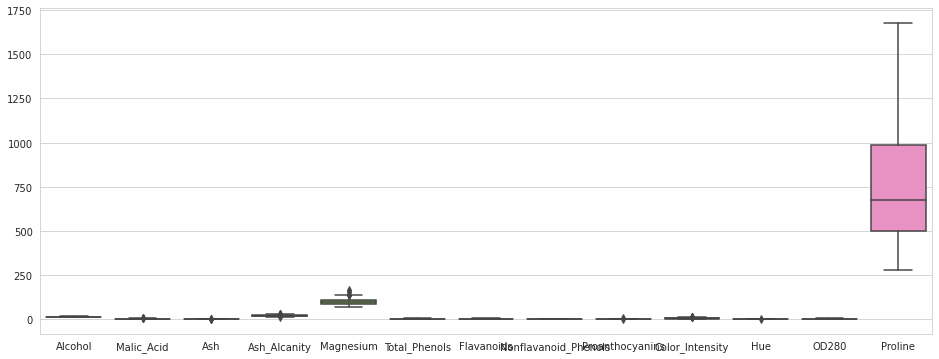

In [5]:
# Boxplot do dataset
plt.figure(figsize = (16,6))
sns.boxplot(data = wine)

Podemos também conferir se há dados duplicados no nosso dataset. 

In [6]:
# Dados duplicados
wine.duplicated().sum()

0

Não há presença de dados duplicados no dataset. 

#### Visualização das distribuições das variáveis 

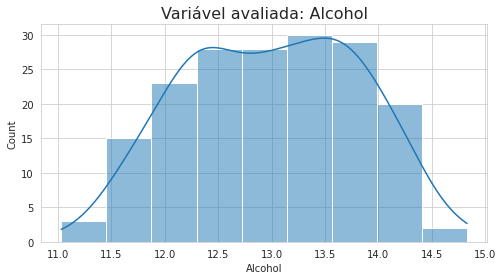

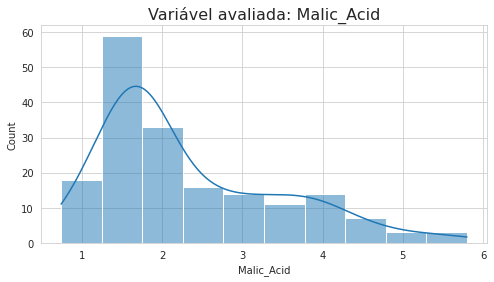

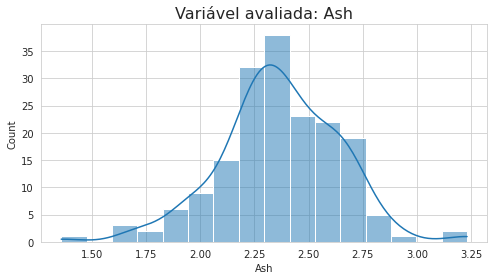

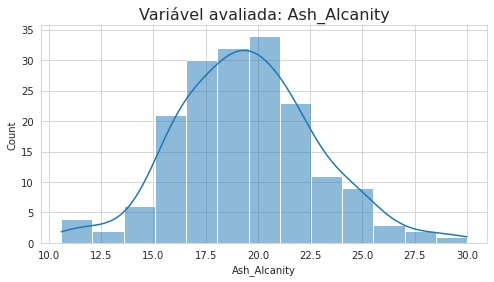

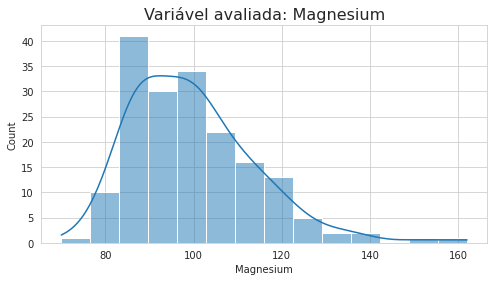

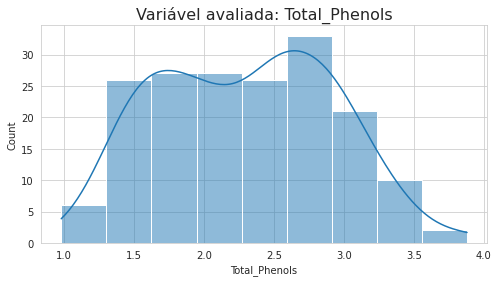

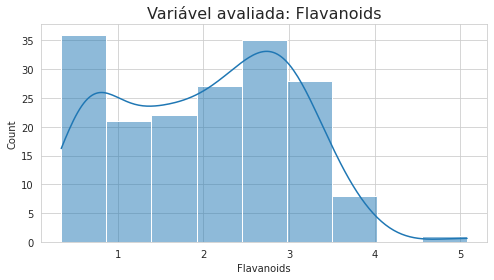

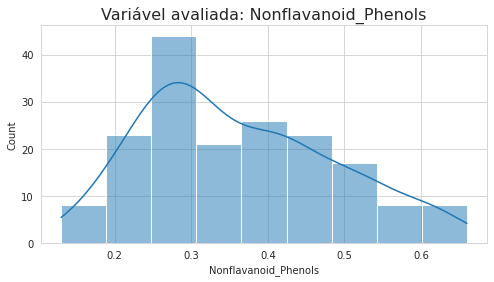

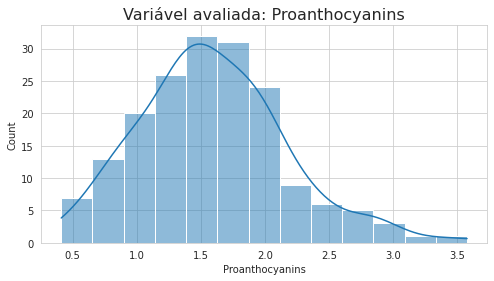

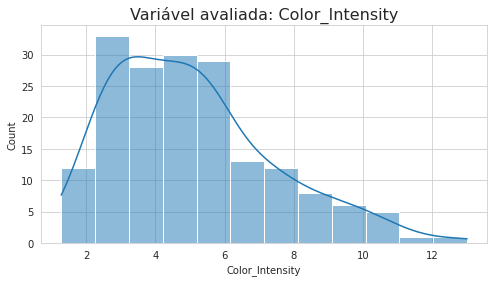

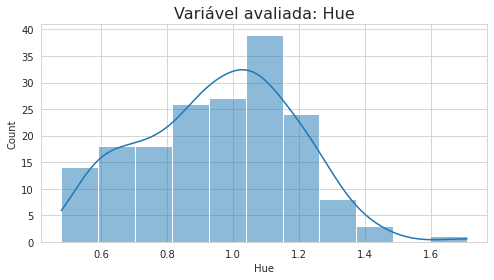

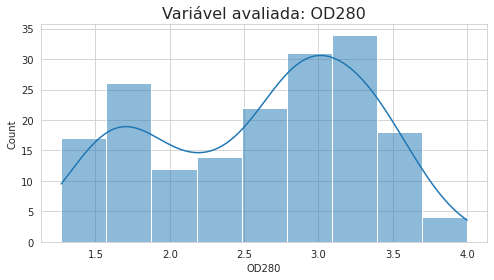

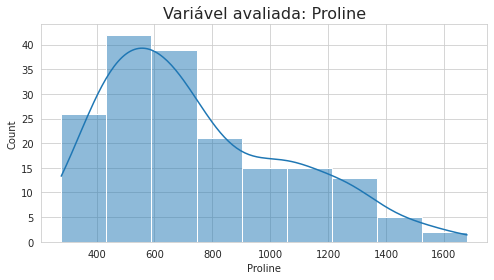

In [7]:
# Gráficos mostrando distribuições das variáveis
for c in wine.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Variável avaliada: {c}", fontsize = 16)
    sns.histplot(wine[c], kde = True)

Podemos observar que muitas dessas distribuições fogem da normalidade. Por isso, para que o modelo tenha melhor desempenho, é necessária a padronização da escala das variáveis para que seus valores fiquem mais próximos a média e se aproximem a uma distribuição normal, para isso usamos o Standard Scaler. 

### Standard Scaler

In [8]:
# Importando funções
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

# Instanciando a função 
new_wine = StandardScaler().fit_transform(wine)

new_wine = PowerTransformer(standardize=False).fit_transform(new_wine)

In [9]:
# Novo dataset, agora padronizado
new_wine = pd.DataFrame(new_wine, columns=wine.columns)
new_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.015199,-0.291833,0.023389,-0.036331,-0.177769,-0.017102,0.007803,-0.128710,-0.087717,-0.198211,0.008995,0.116531,-0.220454
std,1.002558,0.898256,1.001332,1.000137,0.938580,1.002305,1.002873,0.982599,0.987446,0.943597,1.002849,0.990640,0.944720
min,-2.360019,-2.326026,-3.446954,-2.902866,-3.046715,-2.175264,-1.675193,-2.352143,-2.458394,-2.307181,-2.059750,-1.556798,-2.127490
25%,-0.777799,-0.850722,-0.562738,-0.710116,-0.991234,-0.900244,-0.821690,-0.827554,-0.637383,-0.966008,-0.761556,-0.846275,-0.969269
50%,0.061076,-0.502802,-0.023802,0.001518,-0.126279,0.095748,0.106267,-0.181536,-0.063404,-0.166574,0.033146,0.246406,-0.250968
75%,0.847963,0.525745,0.711992,0.586323,0.453060,0.796708,0.855270,0.555772,0.588594,0.436214,0.718463,0.875251,0.624318
max,2.327775,1.516365,3.351710,2.880294,2.526479,2.450308,3.119832,1.853907,2.763271,2.050612,3.377744,2.421421,1.775682


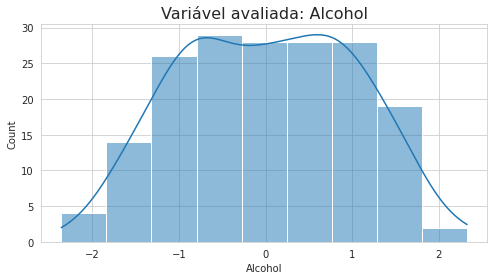

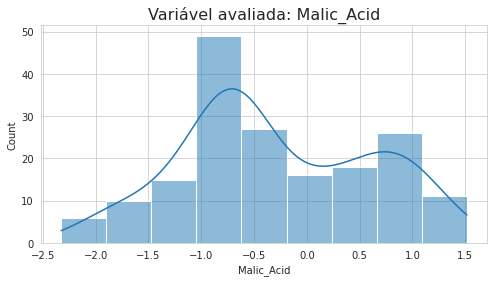

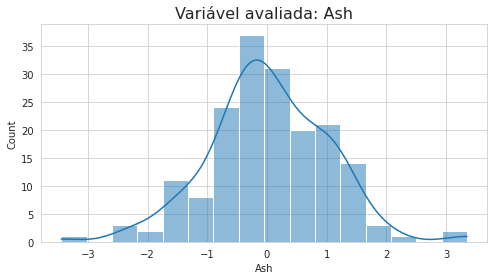

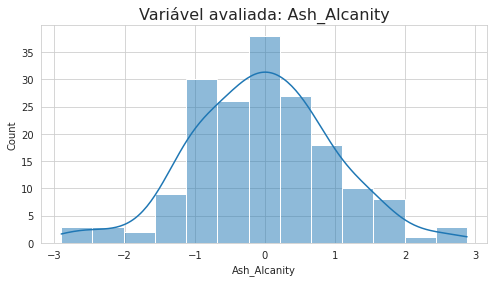

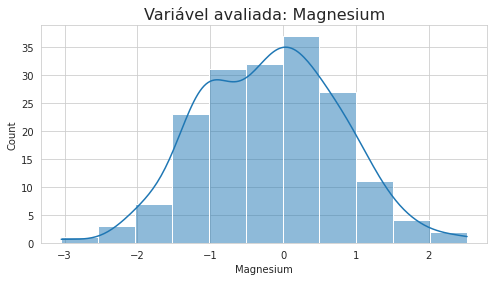

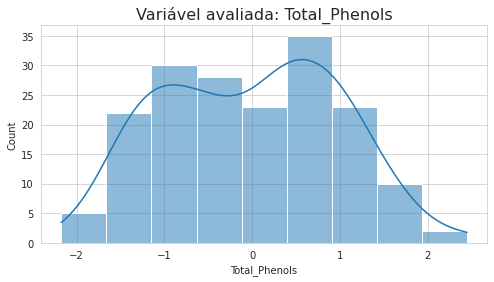

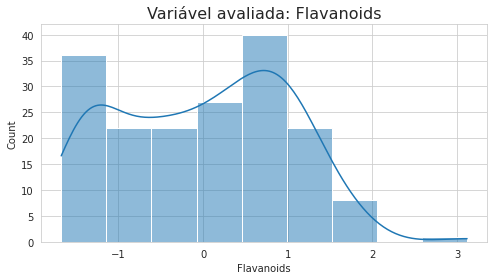

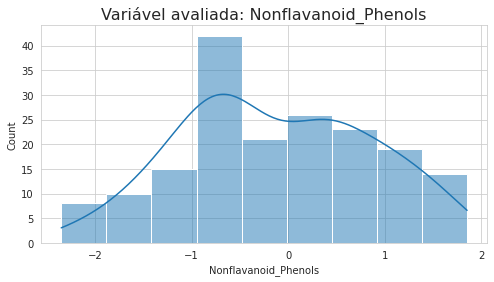

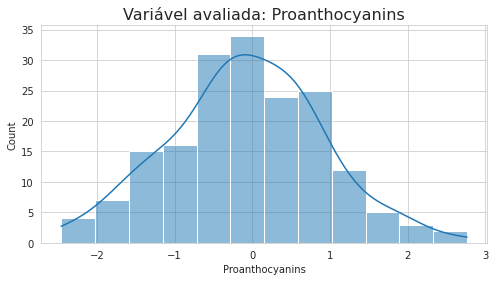

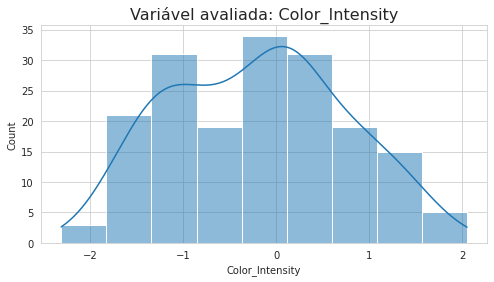

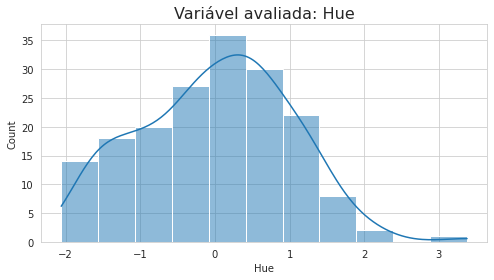

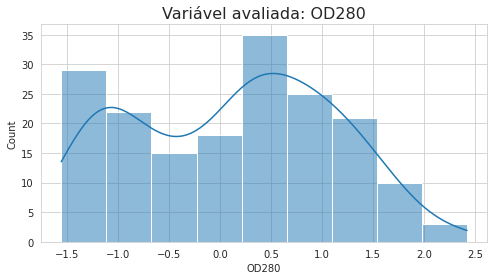

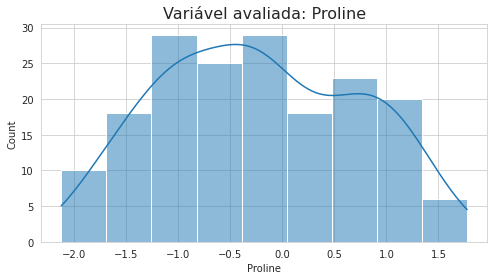

In [10]:
# Podemos visualizar como ficou as distribuições após padronização
for c in wine.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Variável avaliada: {c}", fontsize = 16)
    sns.histplot(new_wine[c], kde = True)

## Modelo de Machine Learning 

O **K-Means** é um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza (ou agrupa) os dados de acordo com suas características. 

Ele possui um número *K de clusters* que aleatoriamente são sorteados numa posição denominada *centroide*. Para cada observação da base, é calculado a distância entre essa observação e os K centroides dos clusters. Desta forma, cada observação terá K distâncias calculadas. Associamos a observação ao cluster cujo centroide está mais próximo dela. Após associar todas as observações aos clusters, é calculado a média das observações de cada cluster e o centroide movido para essa média. 

Esse processo todo é repetido até que os centroides não tenham mais mudanças de posição. Quando chegamos neste ponto, dizemos que o algoritmo *K-Means convergiu* para a solução de descoberta dos clusters.

E também temos a *inertia* que é a soma das distâncias entre cada observação e centroide do cluster ao qual ela pertence, ao quadrado. Quanto mais clusters tiver, a inércia vai diminuindo, mas também atingindo uma estabilização.

In [11]:
# Importando modelo
from sklearn.cluster import KMeans

## K-Means sem qualquer redução de dimensionalidade

Primeiro vamos identificar o número "ideal" de clusters a serem utilizados. 

In [12]:
import random

fixed_random_state = random.seed(42)

inertia_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(new_wine)
    inertia_1.append(kmeans_1.inertia_)

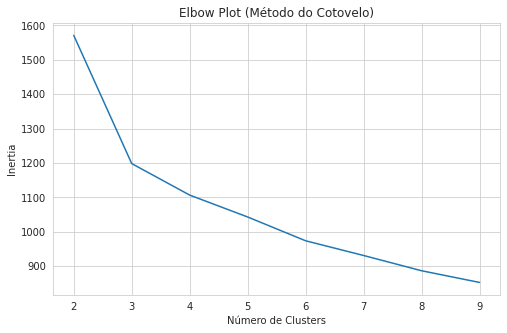

In [13]:
fig, axs = plt.subplots(figsize=(8,5))
sns.lineplot(x=range_clusters_1, y=inertia_1)
plt.title('Elbow Plot (Método do Cotovelo)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

Na análise de cluster, o método do cotovelo é uma heurística usada para determinar o número de clusters em um conjunto de dados. O método consiste em traçar a variação explicada em função do número de clusters e escolher o cotovelo da curva como o número de clusters a utilizar.

Nesse vemos que ele ficou mais proeminente em **3 clusters**.

### Clusterização 

In [14]:
labels_1 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(new_wine)

Precisamos reduzir para 2 dimensões após o agrupamento para poder plotar os resultados.

In [15]:
import umap

reducer_1 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_1  = reducer_1.fit_transform(new_wine)

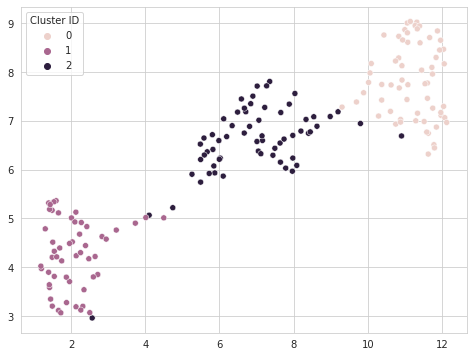

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.legend(title="Cluster ID")
plt.show()

## K-Means com redução de dimensionalidade via PCA

O **método PCA** encontra uma aproximação (redução) dos dados originais. Essa aproximação é armazenada na variável Z. Com os dados da variável Z, o máximo que é possível fazer é aproximar o valor dos dados originais usando os componentes principais. 

In [17]:
# Importando PCA
from sklearn.decomposition import PCA

Primeiros vamos identificar o número "ótimo" de componentes (principais) para manter. 

In [18]:
pca = PCA(n_components=10, random_state=fixed_random_state).fit(new_wine)

princ_comps = np.arange(pca.n_components_, dtype=int) + 1

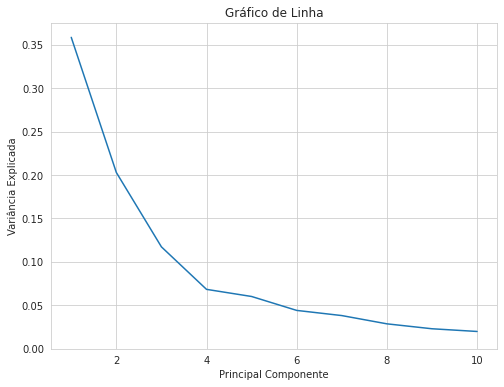

In [19]:
plt.figure(figsize=(8,6))
sns.lineplot(x=princ_comps, y=pca.explained_variance_ratio_)
plt.title('Gráfico de Linha')
plt.xlabel('Principal Componente')
plt.ylabel('Variância Explicada')
plt.ylim(bottom=0)
plt.show()

Nesse caso vemos que a ponta fica mais proeminente em 4 componentes principais.

Então será feito redução em **4 dimensões**.

In [20]:
new_wine_2 = PCA(n_components=4, random_state=fixed_random_state).fit_transform(new_wine)

new_wine_2 = pd.DataFrame(new_wine_2, columns=["pc1", "pc2", "pc3", "pc4"])

new_wine_2.head()

,pc1,pc2,pc3,pc4
0,-3.361355,-1.335128,-0.241050,0.034622
1,-2.232559,0.183505,-2.117771,-0.314983
2,-2.361378,-1.061396,1.076760,0.495528
3,-3.661182,-2.383114,-0.072985,0.715901
4,-0.977118,-1.100360,2.028880,-0.459807


Agora veremos o número "ideal" de clusters a serem usados. 

In [21]:
inertia_2 = []
range_clusters_2 = np.arange(2, 10, dtype=int)

for n in range_clusters_2:
    kmeans_2 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(new_wine_2)
    inertia_2.append(kmeans_2.inertia_)

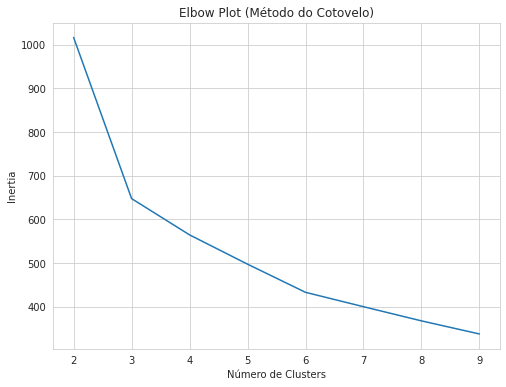

In [22]:
fig, axs = plt.subplots(figsize=(8,6))
sns.lineplot(x=range_clusters_2, y=inertia_2)
plt.title('Elbow Plot (Método do Cotovelo)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

Da mesma forma que o método sem redução de dimensionalidade, ele ficou mais proeminente em **3 clusters**.

#### Clusterização com redução de dimensionalidade 

In [23]:
labels_2 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(new_wine_2)

A redução para 2 dimensões é feita após o agrupamento para poder plotar os resultados


In [24]:
reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_2 = reducer_2.fit_transform(new_wine_2)

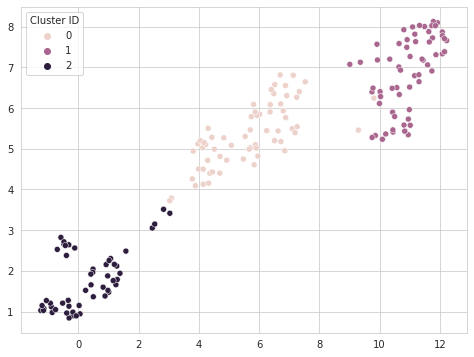

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.legend(title="Cluster ID")
plt.show()

### Comparação das diferentes abordagens 

Feito re-plote dos clusters identificados por cada abordagem lado a lado para podermos comparar de forma mais conveniente. 

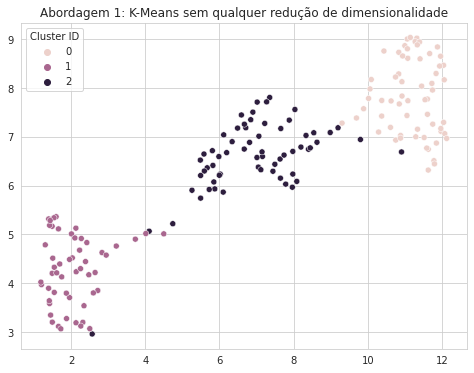

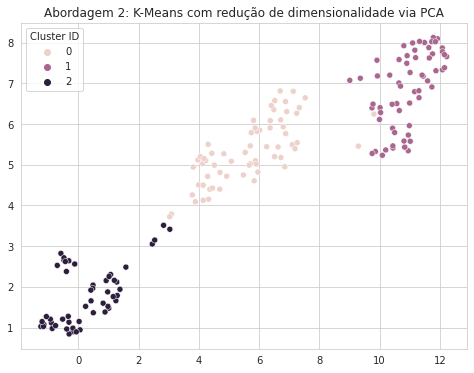

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.title("Abordagem 1: K-Means sem qualquer redução de dimensionalidade")
plt.legend(title="Cluster ID")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.title("Abordagem 2: K-Means com redução de dimensionalidade via PCA")
plt.legend(title="Cluster ID")
plt.show()


### Comparando os elbow plots 

Podemos comparar os gráficos do método cotovelo para cada pesquisa de "número ideal de clusters". 

**Obs.:** a métrica de inertia de K-Means não é normalizada. 

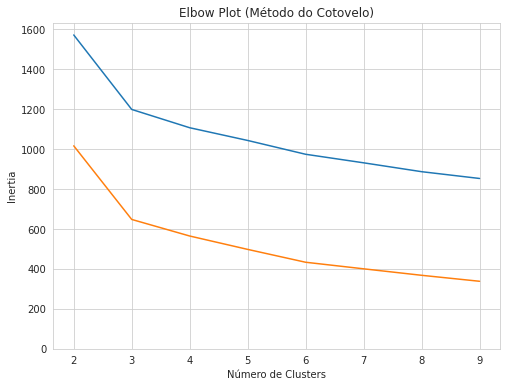

In [27]:
plt.figure(figsize=(8,6))
sns.lineplot(x=range_clusters_1, y=inertia_1)
sns.lineplot(x=range_clusters_2, y=inertia_2)
plt.title('Elbow Plot (Método do Cotovelo)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

Podemos ver que as duas abordagens levaram a mesma conclusão. 

### Comparação das distribuições de recursos para cada cluster 

**Obs.:** Lembre-se de que cada abordagem pode "ordenar" os IDs de cluster de maneira diferente, o que significa que o ID 0 para a abordagem 1 pode ser o mesmo que o ID 2 para a abordagem 2 e o ID 1 para a abordagem 3. Isso ocorre por conta da aleatoriedade a isso, ficando muito complicado reorganizar isso de forma manual. 

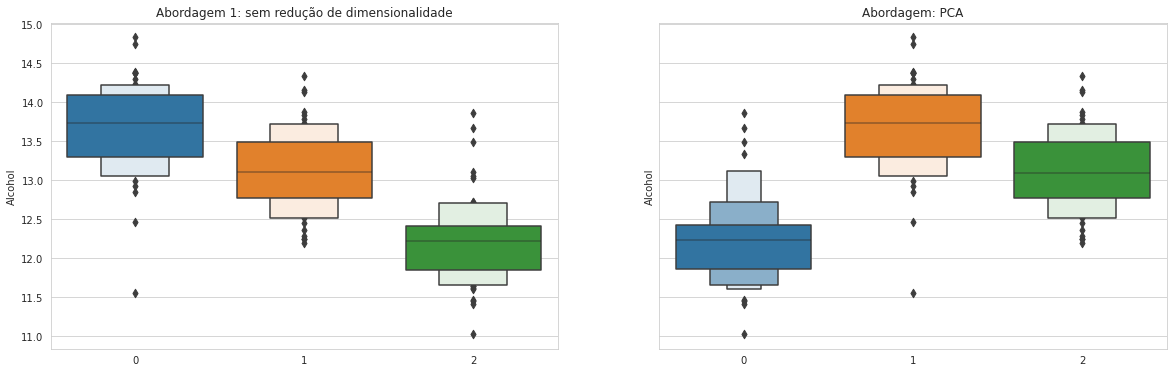

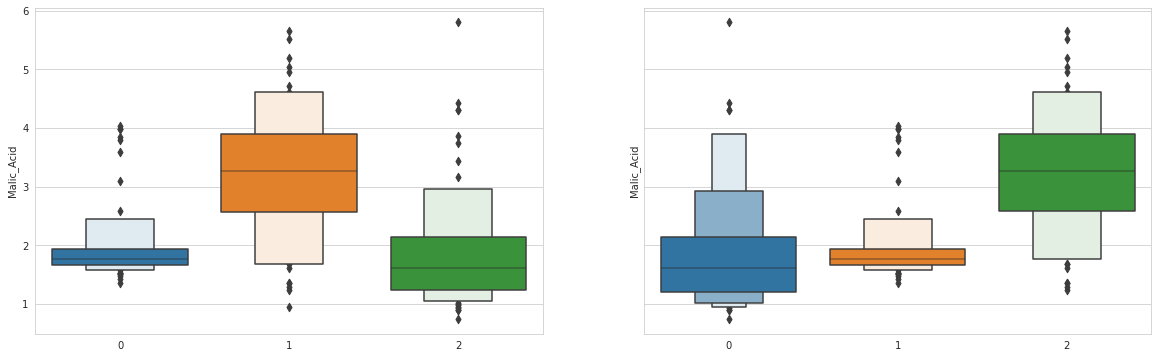

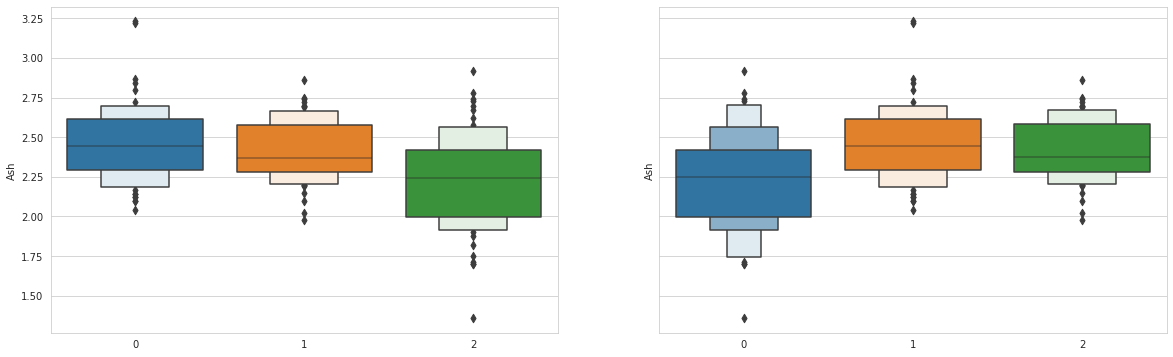

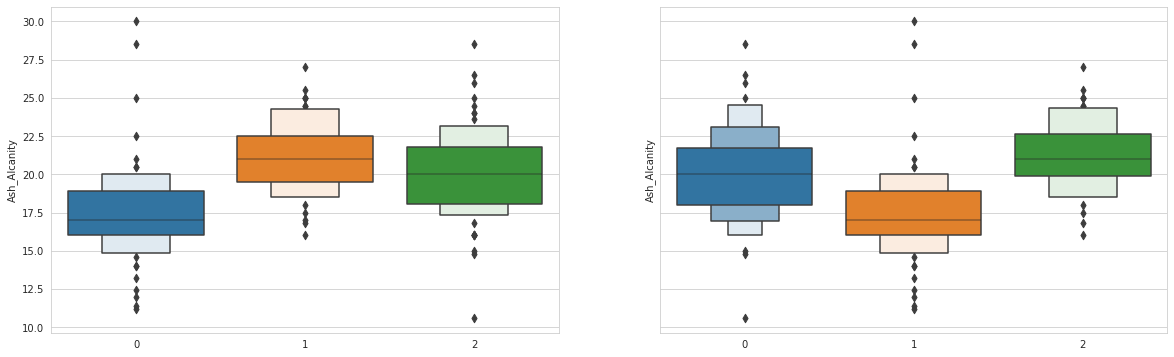

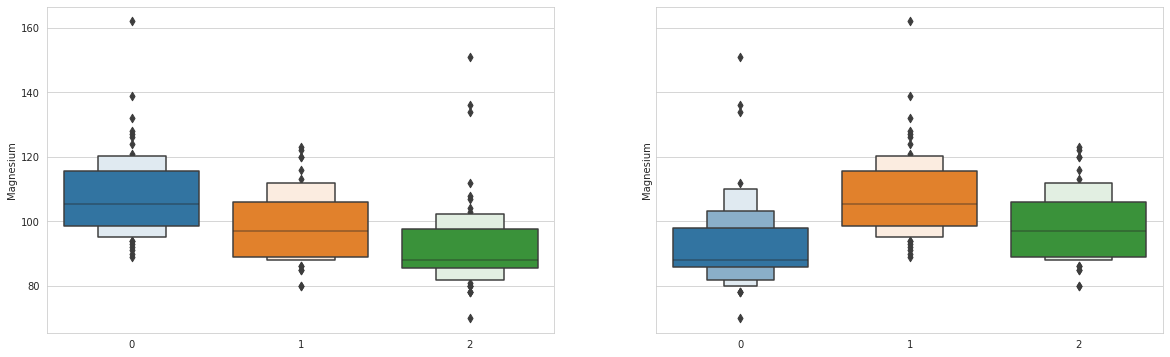

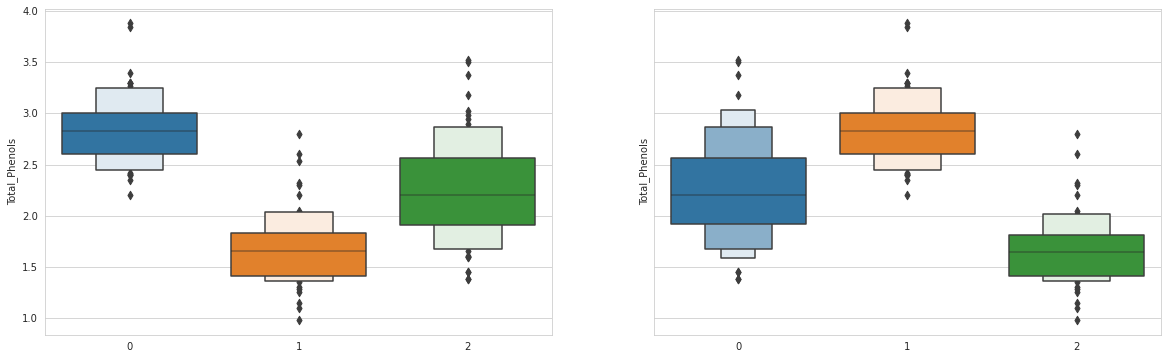

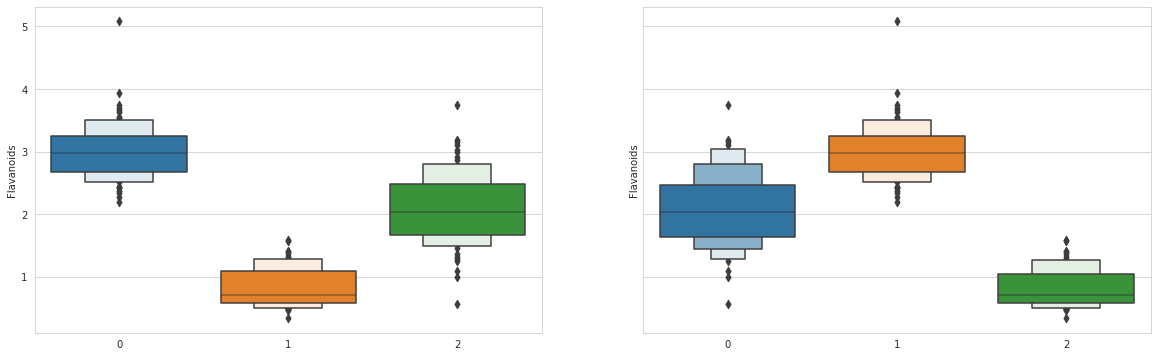

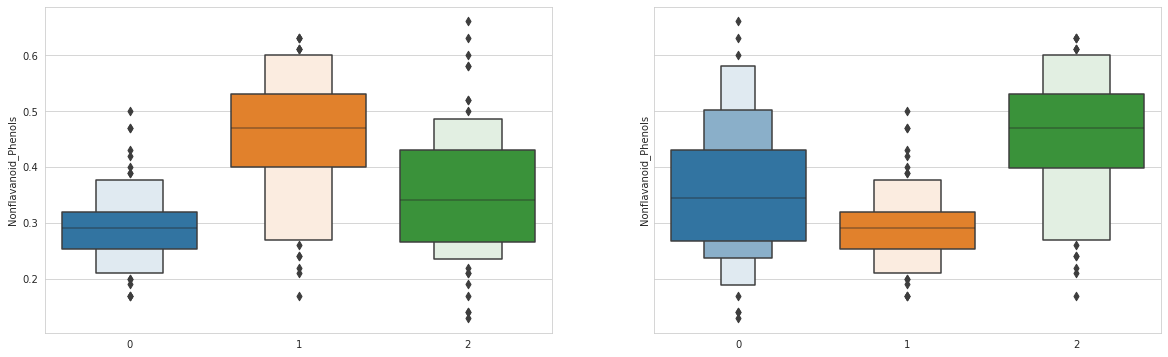

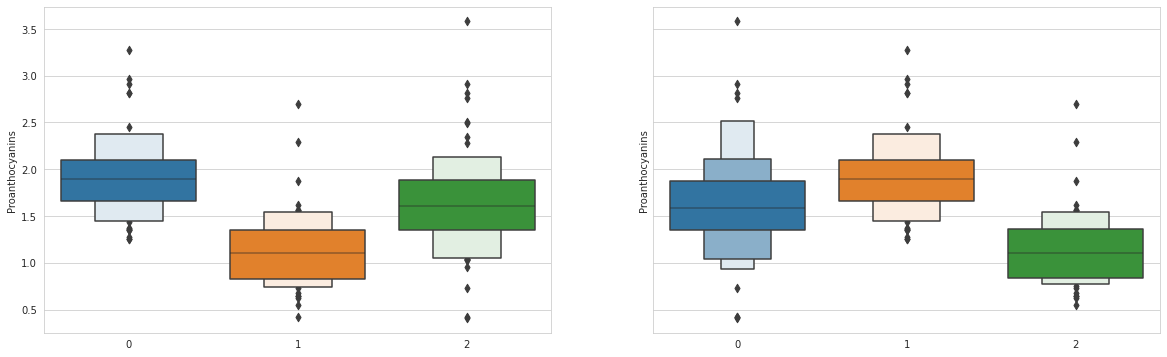

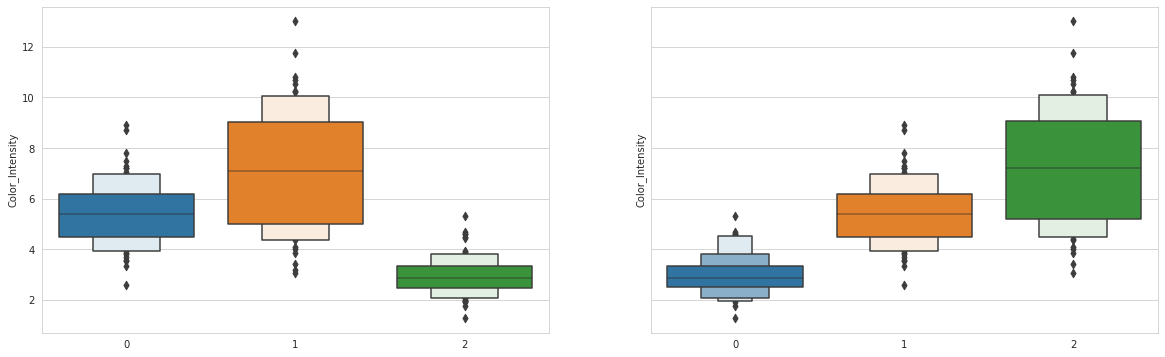

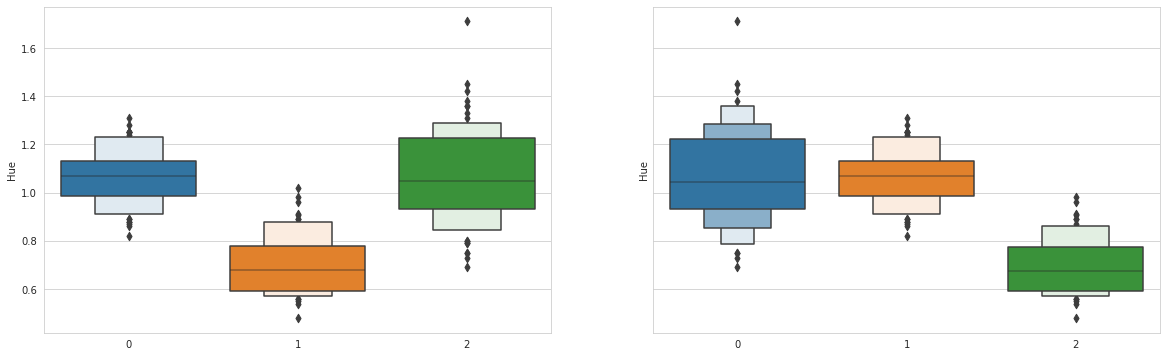

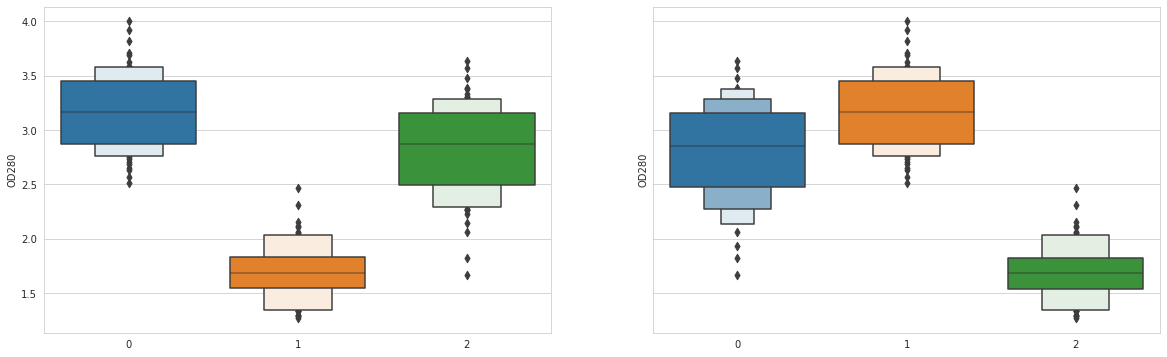

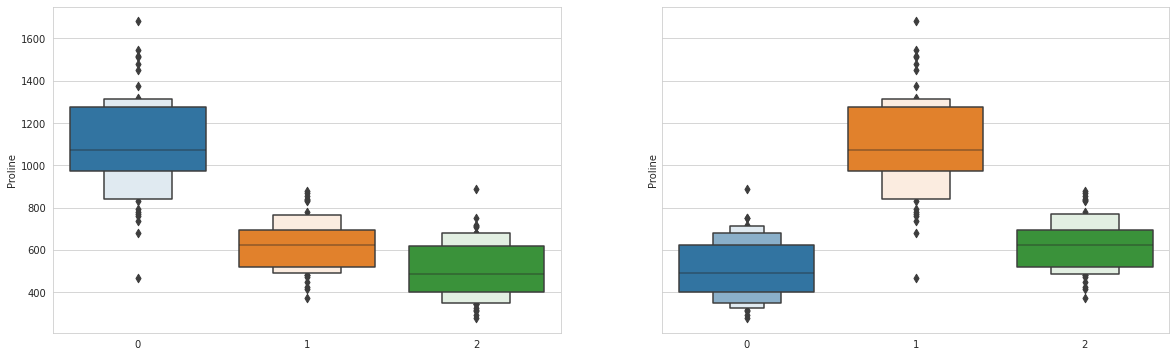

In [28]:
for i, col in enumerate(wine.columns):
    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,6))
    sns.boxenplot(x=labels_1, y=wine[col], ax=axs[0])
    sns.boxenplot(x=labels_2, y=wine[col], ax=axs[1])
    if i == 0:
        axs[0].set_title("Abordagem 1: sem redução de dimensionalidade")
        axs[1].set_title("Abordagem: PCA")
    plt.show()

Podemos ver o sucesso do modelo por conta dos resultados ao se comparar serem praticamente idênticos. 

#### Quantos pontos de dados existem em cada cluster para cada abordagem?

In [29]:
counts_1 = pd.Series(labels_1).value_counts().sort_index()
counts_2 = pd.Series(labels_2).value_counts().sort_index()

cluster_counts = pd.DataFrame({"app_1": counts_1, "app_2": counts_2})

cluster_counts.index.name = "cluster_id"

cluster_counts

,app_1,app_2
cluster_id,,
0,62,64
1,53,62
2,63,52


Ficou muito similar a divisão.

## Conclusão:

A duas abordagens com o algoritmo K-Mens obteve resultados satisfatórios, porém com pequenas sobreposições e diferenças. Não há uma superior ao se comparar.